Pandas and duckdb


## load sakila sqlite -> duckdb

In [1]:
# class
import duckdb

# "r" - read mode for the file we open
with open("sql/load_sakila.sql", "r") as sql_file:
    loading_script = sql_file.read()

print(loading_script)

INSTALL sqlite;

LOAD sqlite;

CALL sqlite_attach('data/sqlite-sakila.db')


In [2]:
# class
type(loading_script)

str

# class-  connect to duckdb

In [3]:
# class


from pathlib import Path

duckdb_path = "data/sakila.duckdb"

# throws away sakila.duckdb if it exists -> makes it idempotent
Path(duckdb_path).unlink(missing_ok=True)

with duckdb.connect(duckdb_path) as conn:
    conn.sql(loading_script)

    description = conn.sql("desc;").df()
    films = conn.sql("FROM film;").df()

description

,database,schema,name,column_names,column_types,temporary
0,sakila,main,actor,"[actor_id, first_name, last_name, last_update]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP]",False
1,sakila,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
2,sakila,main,category,"[category_id, name, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
3,sakila,main,city,"[city_id, city, country_id, last_update]","[BIGINT, VARCHAR, BIGINT, TIMESTAMP]",False
4,sakila,main,country,"[country_id, country, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
5,sakila,main,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",False
6,sakila,main,customer_list,"[ID, name, address, zip_code, phone, city, cou...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, VARCHAR, V...",False
7,sakila,main,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",False
8,sakila,main,film_actor,"[actor_id, film_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",False
9,sakila,main,film_category,"[film_id, category_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",False


In [4]:
# class
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   film_id               1000 non-null   int64         
 1   title                 1000 non-null   object        
 2   description           1000 non-null   object        
 3   release_year          1000 non-null   object        
 4   language_id           1000 non-null   int64         
 5   original_language_id  0 non-null      Int64         
 6   rental_duration       1000 non-null   int64         
 7   rental_rate           1000 non-null   float64       
 8   length                1000 non-null   int64         
 9   replacement_cost      1000 non-null   float64       
 10  rating                1000 non-null   object        
 11  special_features      1000 non-null   object        
 12  last_update           1000 non-null   datetime64[us]
dtypes: Int64(1), dateti

In [5]:
#class
duckdb.sql("from films;").df()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,<NA>,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,<NA>,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,<NA>,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2021-03-06 15:52:08
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,<NA>,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2021-03-06 15:52:08
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,<NA>,6,0.99,105,10.99,NC-17,Deleted Scenes,2021-03-06 15:52:08
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,<NA>,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:08


### class-Create a function to query sakila

In [6]:
##class

def query_sakila(query: str, duckdb_path = "data/sakila.duckdb"):
    with duckdb.connect(duckdb_path) as conn:
        df = conn.sql(query=query).df()

    return df

query_sakila("""
             SELECT 
                actor_id::INT AS actor_id,
                first_name || ' ' || last_name AS actor
             FROM actor;
             """)

,actor_id,actor
0,1,PENELOPE GUINESS
1,2,NICK WAHLBERG
2,3,ED CHASE
3,4,JENNIFER DAVIS
4,5,JOHNNY LOLLOBRIGIDA
...,...,...
195,196,BELA WALKEN
196,197,REESE WEST
197,198,MARY KEITEL
198,199,JULIA FAWCETT


## Join film related dataframes

-film
-film_actor (bridge)
-film_category (bridge)
-actor
-category
-language (join with film)


In [7]:
films_joined = query_sakila("""
    SELECT 
        a.first_name || ' ' || a.last_name AS actor,
        f.title AS film_title,
        f.rating AS film_rating,
        c.name AS category,
        l.name AS language
    FROM film f
        LEFT JOIN film_actor fa ON f.film_id = fa.film_id
        LEFT JOIN actor a ON a.actor_id = fa.actor_id 
        LEFT JOIN film_category fc ON f.film_id = fc.film_id
        LEFT JOIN category c ON c.category_id = fc.category_id
        LEFT JOIN language l ON l.language_id = f.language_id
    ORDER BY 
        film_title
             ;
             """)

films_joined.head(5)

,actor,film_title,film_rating,category,language
0,PENELOPE GUINESS,ACADEMY DINOSAUR,PG,Documentary,English
1,WARREN NOLTE,ACADEMY DINOSAUR,PG,Documentary,English
2,JOHNNY CAGE,ACADEMY DINOSAUR,PG,Documentary,English
3,OPRAH KILMER,ACADEMY DINOSAUR,PG,Documentary,English
4,MENA TEMPLE,ACADEMY DINOSAUR,PG,Documentary,English


### how many actors are there in each film?

In [8]:
#ömer

query_sakila("""
    SELECT
        film_title,
        COUNT(DISTINCT actor) AS actor_count
    FROM films_joined
    GROUP BY film_title
    ORDER BY actor_count DESC;
""").head()

,film_title,actor_count
0,LAMBS CINCINATTI,15
1,BOONDOCK BALLROOM,13
2,DRACULA CRYSTAL,13
3,MUMMY CREATURES,13
4,RANDOM GO,13


In [9]:
type(films_joined.groupby("film_title")["actor"].nunique())

pandas.core.series.Series

In [10]:
#danilea

films_joined.groupby("film_title")["actor"].nunique().sort_values(
    ascending=False
).reset_index().head()

,film_title,actor
0,LAMBS CINCINATTI,15
1,DRACULA CRYSTAL,13
2,CRAZY HOME,13
3,BOONDOCK BALLROOM,13
4,CHITTY LOCK,13


In [11]:
#lilit

total_actors = query_sakila("""
    SELECT
     film_title,
     count (actor) AS total_actors,
    FROM films_joined
    GROUP BY film_title
    ORDER BY total_actors desc;
""")
total_actors.head(5)

,film_title,total_actors
0,LAMBS CINCINATTI,15
1,MUMMY CREATURES,13
2,BOONDOCK BALLROOM,13
3,CHITTY LOCK,13
4,RANDOM GO,13


In [12]:
films_joined.query("film_title == 'ACADEMY DINOSAUR'")

,actor,film_title,film_rating,category,language
0,PENELOPE GUINESS,ACADEMY DINOSAUR,PG,Documentary,English
1,WARREN NOLTE,ACADEMY DINOSAUR,PG,Documentary,English
2,JOHNNY CAGE,ACADEMY DINOSAUR,PG,Documentary,English
3,OPRAH KILMER,ACADEMY DINOSAUR,PG,Documentary,English
4,MENA TEMPLE,ACADEMY DINOSAUR,PG,Documentary,English
5,ROCK DUKAKIS,ACADEMY DINOSAUR,PG,Documentary,English
6,SANDRA PECK,ACADEMY DINOSAUR,PG,Documentary,English
7,CHRISTIAN GABLE,ACADEMY DINOSAUR,PG,Documentary,English
8,LUCILLE TRACY,ACADEMY DINOSAUR,PG,Documentary,English
9,MARY KEITEL,ACADEMY DINOSAUR,PG,Documentary,English


In [13]:
# with duckdb.sql we can directly query a dataframe
# don't need to connect to an existing database file
duckdb.sql("SELECT film_title, film_rating FROM films_joined").df().head()

,film_title,film_rating
0,ACADEMY DINOSAUR,PG
1,ACADEMY DINOSAUR,PG
2,ACADEMY DINOSAUR,PG
3,ACADEMY DINOSAUR,PG
4,ACADEMY DINOSAUR,PG


# Visualization

in visualization - need to have

xlabel
ylabel
title

### plot in pandas

-dataframes has this "method" plot()
-its a wrapper around matplotlib
-convenice "method" to use

matplotlib.axes._axes.Axes

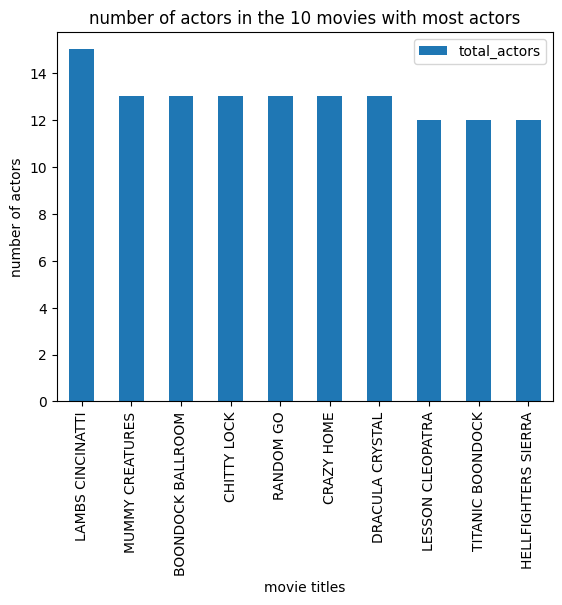

In [14]:

ax = total_actors.head(10).plot(
    x="film_title",
    y="total_actors",
    kind="bar",
    xlabel="movie titles",
    ylabel="number of actors",
    title = "number of actors in the 10 movies with most actors"
)

# instance of an Axes class
type(ax)

In [34]:
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("actor_count_bar.png", dpi=150)

## draw directly in matplotlib

In [16]:
df = total_actors.head(10)
df

,film_title,total_actors
0,LAMBS CINCINATTI,15
1,MUMMY CREATURES,13
2,BOONDOCK BALLROOM,13
3,CHITTY LOCK,13
4,RANDOM GO,13
5,CRAZY HOME,13
6,DRACULA CRYSTAL,13
7,LESSON CLEOPATRA,12
8,TITANIC BOONDOCK,12
9,HELLFIGHTERS SIERRA,12


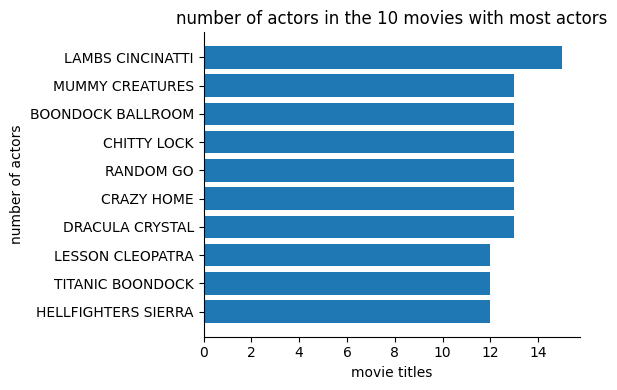

In [35]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(6,4))
ax.barh(y=df["film_title"], width=df["total_actors"])
ax.invert_yaxis()
ax.set(
    xlabel="movie titles",
    ylabel="number of actors",
    title="number of actors in the 10 movies with most actors",
)

ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()
fig.savefig("actor_count_hbar.png", dpi = 150)

# Markdown from video lesson NOT FROM CLASS

## from video lessons

In [18]:
import duckdb
from pathlib import Path

duckdb_path = "data/sakila.duckdb"
Path(duckdb_path).unlink(missing_ok=True)

with duckdb.connect(duckdb_path) as conn, open("sql/load_sakila.sql") as ingest_script:
    conn.sql(ingest_script.read())

    description = conn.sql("DESC;").df()
    films = conn.sql("FROM film;").df()

films.head(3)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00


In [19]:
description.head()

,database,schema,name,column_names,column_types,temporary
0,sakila,main,actor,"[actor_id, first_name, last_name, last_update]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP]",False
1,sakila,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
2,sakila,main,category,"[category_id, name, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
3,sakila,main,city,"[city_id, city, country_id, last_update]","[BIGINT, VARCHAR, BIGINT, TIMESTAMP]",False
4,sakila,main,country,"[country_id, country, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False


## Read all data into dictionary of pandas dataframes

In [20]:
dfs = {}

with duckdb.connect(duckdb_path) as conn:
    for name in description["name"]:
        dfs[name] = conn.sql(f"FROM {name};").df()

dfs.keys()

dict_keys(['actor', 'address', 'category', 'city', 'country', 'customer', 'customer_list', 'film', 'film_actor', 'film_category', 'film_list', 'film_text', 'inventory', 'language', 'payment', 'rental', 'sales_by_film_category', 'sales_by_store', 'staff', 'staff_list', 'store'])

## Check some film related dataframes

In [21]:
dfs["film_actor"].head()

,actor_id,film_id,last_update
0,1,1,2021-03-06 15:52:45
1,1,23,2021-03-06 15:52:45
2,1,25,2021-03-06 15:52:45
3,1,106,2021-03-06 15:52:45
4,1,140,2021-03-06 15:52:45


In [22]:
dfs["film"].head(2)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00


In [23]:
dfs["film_category"].head()

,film_id,category_id,last_update
0,1,6,2021-03-06 15:53:28
1,2,11,2021-03-06 15:53:28
2,3,6,2021-03-06 15:53:28
3,4,11,2021-03-06 15:53:28
4,5,8,2021-03-06 15:53:28


In [24]:
dfs["actor"].head()

,actor_id,first_name,last_name,last_update
0,1.0,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2.0,NICK,WAHLBERG,2021-03-06 15:51:59
2,3.0,ED,CHASE,2021-03-06 15:51:59
3,4.0,JENNIFER,DAVIS,2021-03-06 15:51:59
4,5.0,JOHNNY,LOLLOBRIGIDA,2021-03-06 15:51:59


Register all dataframes in duckdb

In [25]:
film_names = ("film","film_actor","film_category","actor","category")

for film_name in film_names:
    duckdb.register(film_name, dfs[film_name])

duckdb.sql("desc;").df()

,database,schema,name,column_names,column_types,temporary
0,temp,main,actor,"[actor_id, first_name, last_name, last_update]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP]",True
1,temp,main,category,"[category_id, name, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",True
2,temp,main,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",True
3,temp,main,film_actor,"[actor_id, film_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",True
4,temp,main,film_category,"[film_id, category_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",True


## Join film related dataframes using duckdb

In [26]:
films_joined = duckdb.sql("""
    SELECT
        a.first_name || ' '  || a.last_name AS actor,
        a.actor_id::INT as actor_id,
        f.title,
       f.description,
        f.release_year,
        f.rental_duration,        
        f.rating, 
        c.name AS category
    FROM film f
        LEFT JOIN film_actor fa ON f.film_id = fa.film_id
        LEFT JOIN actor a ON a.actor_id = fa.actor_id
        LEFT JOIN film_category fc ON fc.film_id= f.film_id
        LEFT JOIN category c ON fc.category_id= c.category_id
     
           
    """).df()

films_joined.columns

Index(['actor', 'actor_id', 'title', 'description', 'release_year',
       'rental_duration', 'rating', 'category'],
      dtype='object')

## Now do some more EDA


In [27]:
films_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5465 entries, 0 to 5464
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   actor            5462 non-null   object
 1   actor_id         5462 non-null   Int32 
 2   title            5465 non-null   object
 3   description      5465 non-null   object
 4   release_year     5465 non-null   object
 5   rental_duration  5465 non-null   int64 
 6   rating           5465 non-null   object
 7   category         5465 non-null   object
dtypes: Int32(1), int64(1), object(6)
memory usage: 325.7+ KB


In [28]:
films_joined["rating"].value_counts()

rating
PG-13    1184
PG       1143
NC-17    1128
R        1033
G         977
Name: count, dtype: int64

In [29]:
films_joined["rental_duration"].value_counts()

rental_duration
6    1201
4    1113
3    1087
5    1057
7    1007
Name: count, dtype: int64

In [30]:
films_joined.describe()["rental_duration"]

count    5465.000000
mean        4.986825
std         1.398667
min         3.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         7.000000
Name: rental_duration, dtype: float64

In [31]:
films_joined.columns

Index(['actor', 'actor_id', 'title', 'description', 'release_year',
       'rental_duration', 'rating', 'category'],
      dtype='object')

## which top 10 actors have playes in most films?

In [32]:

actor_films = duckdb.sql(""" 
            SELECT 
        actor,
        COUNT(*) AS number_films
    FROM films_joined
    GROUP BY actor
    ORDER BY number_films DESC
           
    """).df()

actor_films.head(10)


,actor,number_films
0,SUSAN DAVIS,54
1,GINA DEGENERES,42
2,WALTER TORN,41
3,MARY KEITEL,40
4,MATTHEW CARREY,39
5,SANDRA KILMER,37
6,SCARLETT DAMON,36
7,ANGELA WITHERSPOON,35
8,HENRY BERRY,35
9,UMA WOOD,35


## Visualize this 

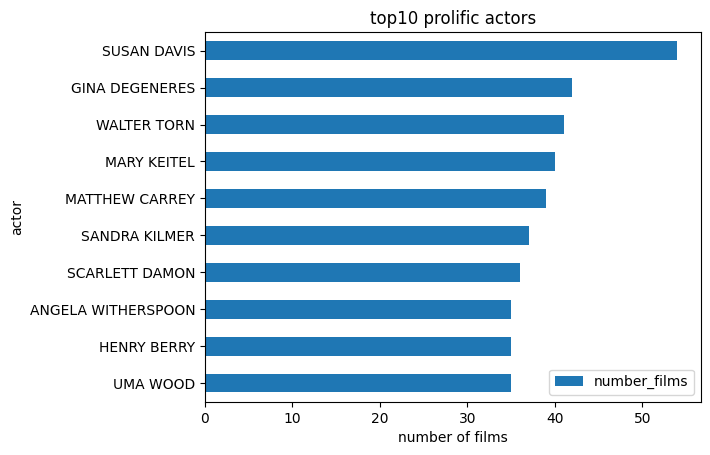

In [33]:
ax = actor_films.head(10).plot(kind="barh", x = "actor", y = "number_films", title="top10 prolific actors", xlabel="number of films", 
)
ax.invert_yaxis()